In [15]:
!pip install numpy
!pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.6 MB 991.0 kB/s eta 0:00:08
      --------------------------------------- 0.2/7.6 MB 1.6 MB/s eta 0:00:05
     - -------------------------------------- 0.3/7.6 MB 2.2 MB/s eta 0:00:04
     -- ------------------------------------- 0.5/7.6 MB 2.7 MB/s eta 0:00:03
     ----- ---------------------------------- 1.0/7.6 MB 4.1 MB/s eta 0:00:02
     --------- ------------------------------ 1.9/7.6 MB 6.7 MB/s eta 0:00:01
     ------------------ --------------------- 3.6/7.6 MB 11.0 MB/s eta 0:00:01
     ------------------------ --------------- 4.7/7.6 MB 12.5 MB/s eta 0:00:01
     ---------------------------------- ----- 6.6/7.6 MB 16.2 MB/s eta 0:00:01
     ---------------------------------------  7.6/7.6 MB 17.5 MB/s eta 0:00:01
     ---------------------------------------  7.6/7.6 MB 17.5 MB/s eta 0:00:01
     ---------------------------------------  7.6/7.6 MB 17.5 MB

In [11]:
file_path = 'data.v3.txt'

In [12]:
data_array = np.loadtxt(file_path)
array1 = data_array[:, 0] 
array2 = data_array[:, 1]  
array3 = data_array[:, 2] 

In [13]:
print("Array 1:")
print(array1)

print("\nArray 2:")
print(array2)

print("\nArray 3:")
print(array3)

Array 1:
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39.]

Array 2:
[ 49.1893  54.8448  40.1114  26.1809  40.7383  71.9467  33.5833 131.364
  68.197  131.095   37.2666 189.868  125.03    99.6729 127.271  106.426
 153.886  153.381   94.8586 136.245  166.235  139.36   136.896  148.319
 144.289  172.145  204.599  178.184  207.157  268.206  197.244  291.271
 261.346  240.729  211.113  223.606  258.455  226.111  276.129  238.149 ]

Array 3:
[30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30.
 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30.
 30. 30. 30. 30.]


Text(0, 0.5, 'Y values')

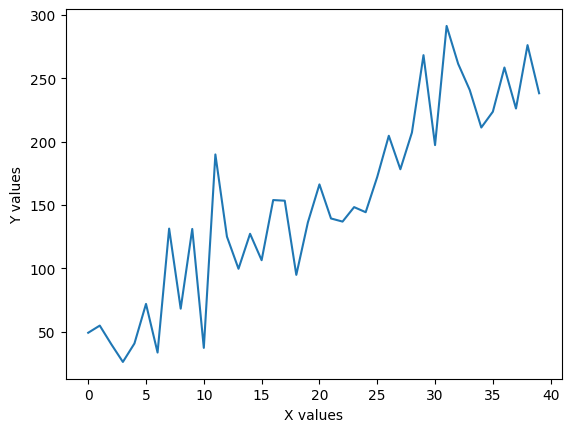

In [18]:
plt.plot(array1,array2, label='Plot')
plt.xlabel("X values")
plt.ylabel("Y values")